This will become apart of raw_data_transformation.py once its approved by group members 

In [2]:
#import geopy
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.distance import great_circle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmplot

In [2]:
tdata = pd.read_csv('merge_data_update.csv', index_col=0)
locator = Nominatim(user_agent="myGeocoder")

In [3]:
def getlatlong(address):
    try:
        address=address+', Ames, Iowa'
    
        location = locator.geocode(address)
        lat=location[1][0]
        long=location[1][1]
        return [lat,long]
    except:
        return ''
    

In [4]:
def distancetoUoI(latlong):
    UofIowa=[42.026640, -93.646456]
    try:
        return great_circle(latlong, UofIowa).km
    except:
        return ''
        

In [5]:
tdata.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [ ]:
tdata['Lat_Long']=tdata.Prop_Addr.apply((lambda address:  getlatlong(address)))




In [ ]:
tdata['Dist_From_UoI']=tdata.Lat_Long.apply(lambda latlong:  distancetoUoI(latlong))

In [ ]:
tdata.Prop_Addr

In [ ]:
locator.geocode('1505 Little Bluestem Ct, Ames, Iowa')

# Finds Dist Btw All Houses

In [5]:
tdata = pd.read_csv('initial_condensed_data_TEST.csv', index_col=0)

In [1]:
def distancebetween(latlong1,latlong2):
    
    try:
        return great_circle(latlong1, latlong2).km
    except:
        return 100 #these do not have distance- putting in ridiculous number so no error in compling to matrix will remove 
        

In [3]:
def cleanlatlong(latlong):
    try:
        return [float(i) for i in latlong.replace('[', '').replace(']', '').replace(',', '').split()]
    except:
        return ''
    

In [6]:
tdata.Lat_Long=tdata.Lat_Long.apply(lambda x: cleanlatlong(x))


In [7]:
tdata=tdata[(tdata.Lat_Long=='')==False]

In [8]:
tdata.Lat_Long[(tdata.Lat_Long=='')]

Series([], Name: Lat_Long, dtype: object)

In [9]:
distmatrix=np.zeros((len(tdata), len(tdata)))
for i in range(len(tdata)):
    for j in range(i):
        distmatrix[i,j]=distancebetween(tdata.Lat_Long.iloc[i],tdata.Lat_Long.iloc[j])
        
        

In [10]:
distdf=pd.DataFrame(distmatrix)

In [11]:
distdf

,0,1,2,3,4,5,6,7,8,9,...,818,819,820,821,822,823,824,825,826,827
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.923634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,3.612065,2.883038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,1.612197,2.535556,5.020051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,7.172533,6.597174,3.812771,8.296048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,3.725824,4.327283,5.292958,3.036291,7.295616,0.202555,4.063652,5.836930,3.742528,1.579638,...,3.304588,4.467109,2.634637,4.183028,4.332900,0.000000,0.000000,0.000000,0.000000,0.0
824,3.537835,3.104777,1.370990,4.619067,3.681768,4.079299,2.794303,2.273848,4.102576,4.407666,...,3.444969,2.976588,3.177614,2.430820,0.167095,4.181314,0.000000,0.000000,0.000000,0.0
825,1.354559,0.682937,2.268283,2.871986,5.929110,3.955432,0.416333,2.165560,1.958456,5.142899,...,1.498590,0.571079,1.749942,0.044789,2.540849,4.138568,2.423426,0.000000,0.000000,0.0
826,3.296734,2.655543,0.517259,4.626629,3.943605,4.647700,2.409787,1.336365,3.897739,5.209246,...,3.317817,2.471922,3.243072,1.986686,0.926686,4.777399,0.938754,1.996227,0.000000,0.0


In [12]:
#distdf=distdf.replace({100: 0}, regex=True) #removes the 100

In [13]:
distdf.to_csv(r'Distance_Matrix.csv', index=False)

In [15]:
#ones in blueste have nas bc unit numbers and geopy cant find but there are only 7 fill in this 


#distancetoUoI([42.001852, -93.644843])

In [16]:
#plt.plot(tdata.Lat_Long[0][0],tdata.Lat_Long[0][1])

In [17]:
def seperatelat(latlong):
    try:
        return latlong[0]
    except:
        return ''
def seperatelong(latlong):
    try:
        return latlong[1]
    except:
        return ''
#tdata['Lat'], tdata['Long']=
tdata['Lat']=tdata.Lat_Long.apply(lambda x: seperatelat(x))
tdata['Long']=tdata.Lat_Long.apply(lambda x: seperatelong(x))

(41.98265753783516, 42.0671477054616, -93.69863507461659, -93.5748322797817)

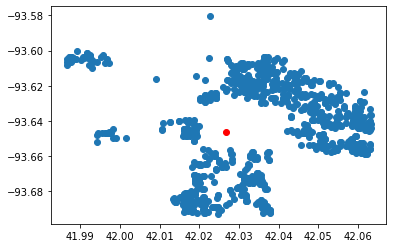

In [18]:
plt.scatter(tdata.Lat,tdata.Long)
plt.scatter(42.026640, -93.646456, c='red')
plt.axis()

In [19]:
xmin

NameError: name 'xmin' is not defined

In [20]:

  
latitude_list = tdata.Lat
longitude_list = tdata.Long
  
gmap3 = gmplot.GoogleMapPlotter(42,
                               -93.5, 13)
  

# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, '# FF0000',
                              size = 40, marker = False )

gmap3.draw( "mapofiowa.html" )

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/gmplot/color.py:194: UserWarning: Color '# FF0000' isn't supported.
  warnings.warn("Color '%s' isn't supported." % color)
